In [708]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.lines import Line2D
import seaborn as sns
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Slider, CustomJS, Legend, LegendItem, TextInput
from bokeh.layouts import column
from bokeh.palettes import Category20
from bokeh.palettes import TolRainbow
from bokeh.transform import factor_cmap
from bokeh.plotting import output_notebook
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from itertools import cycle
# Ensure Bokeh plots are displayed in the notebook
output_notebook()

Loading BokehJS ...

# Vizual identity prep

In [709]:
#font_prop = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\source-sans-pro.ttf')
font_reg = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Regular.otf")
font_bold = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Bold.otf")
font_italic = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-It.ttf")
font_light = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Light.otf")
font_legend = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Light.otf", size=12)  # Set the font size here

In [710]:
sbt_palette = [
    "#F26749",  # Crab
    "#F5B7B1",  # Warm Blush
    "#83A5F2",  # Vista blue
    "#204ECF",  # Deep Ocean
    "#EA9836",  # Butterscotch
    # Pastel extended palette
    "#F28C70",  # Lighter Crab
    "#B23A1D",  # Darker Crab
    "#FADBD8",  # Lighter Warm Blush
    "#E5989B",  # Deeper Warm Blush
    "#A1B6F5",  # Lighter Vista Blue
    "#516FD9",  # Midpoint Blue
    "#122E8A",  # Darker Deep Ocean
    "#7C9BF2",  # Muted Vista Blue
    "#A8D5BA",  # Lighter Green (Replacing Lighter Butterscotch)
    "#9C4700",  # More Contrasty Butterscotch
    "#F2E1DC",  # Soft Neutral
    "#F4C2C2",  # Warm Neutral
    "#CBD4F7",  # Soft Cool Tone
    "#BFD0E5",  # Neutral Blue Tint
    "#D47A5F",  # Earthy Warm Blend
    "#8C9EFF",  # Punchy Cool Accent
    "#F7D59C",  # Pale Orange Glow
    "#F7A76C",  # Vibrant Warm
    "#D44A1C",  # Bold Warm Tone
    "#8390F2",  # Cool Complement 
]

# Data prep

In [711]:
filepath = r'ByCompany.csv'
Comp_dk = pd.read_csv(filepath, sep=';')
filepath = r'ByTargets.csv'
Targ_dk = pd.read_csv(filepath, sep=';')

In [712]:
#Targ.info()
#Comp.info()
Targ_dk = Targ_dk.copy()
Comp_dk = Comp_dk.copy()

In [713]:
# Mapping of sectors to categories
sector_category_map = {
    'Ground Transportation - Railroads Transportation': 'Transportation',
    'Semiconductors and Semiconductors Equipment': 'Technology',
    'Air Freight Transportation and Logistics': 'Transportation',
    'Trading Companies and Distributors, and Commercial Services and Supplies': 'Commercial Services',
    'Water Transportation - Water Transportation': 'Transportation',
    'Food and Beverage Processing': 'Food and Beverage',
    'Telecommunication Services': 'Telecommunication',
    'Construction and Engineering': 'Construction',
    'Pharmaceuticals, Biotechnology and Life Sciences': 'Healthcare',
    'Professional Services': 'Professional Services',
    'Containers and Packaging': 'Packaging',
    'Real Estate': 'Real Estate',
    'Consumer Durables, Household and Personal Products': 'Consumer Products',
    'Electric Utilities and Independent Power Producers and Energy Traders': 'Energy',
    'Electric Utilities and Independent Power Producers and Energy Traders (including Fossil, Alternative and Nuclear Energy)': 'Energy',
    'Retailing': 'Retail',
    'Mining - Iron, Aluminum, Other Metals': 'Mining',
    'Textiles, Apparel, Footwear and Luxury Goods': 'Consumer Products',
    'Software and Services': 'Technology',
    'Hotels, Restaurants and Leisure, and Tourism Services': 'Hospitality',
    'Electrical Equipment and Machinery': 'Manufacturing',
    'Food Production - Agricultural Production': 'Food Production',
    'Building Products': 'Construction',
    'Food and Staples Retailing': 'Retail',
    'Automobiles and Components': 'Automotive',
    'Forest and Paper Products - Forestry, Timber, Pulp and Paper, Rubber': 'Forestry and Paper Products',
    'Tobacco': 'Tobacco',
    'Solid Waste Management Utilities': 'Utilities',
    'Chemicals': 'Chemicals',
    'Construction Materials': 'Construction',
    'Technology Hardware and Equipment': 'Technology',
    'Mining - Other (Rare Minerals, Precious Metals and Gems)': 'Mining',
    'Water Utilities': 'Utilities',
    'Homebuilding': 'Construction',
    'Ground Transportation - Highways and Railtracks': 'Transportation',
    'Food Production - Animal Source Food Production': 'Food Production',
    'Healthcare Equipment and Supplies': 'Healthcare',
    'Air Transportation - Airport Services': 'Transportation',
    'Media': 'Media',
    'Banks, Diverse Financials, Insurance': 'Financial Services',
    'Ground Transportation - Trucking Transportation': 'Transportation',
    'Specialized Consumer Services': 'Consumer Services',
    'Specialized Financial Services, Consumer Finance, Insurance Brokerage Firms': 'Financial Services',
    'Healthcare Providers and Services, and Healthcare Technology': 'Healthcare',
    'Water Transportation - Ports and Services': 'Transportation',
    'Air Transportation - Airlines': 'Transportation',
    'Aerospace and Defense': 'Defense',
    'Tires': 'Automotive',
    'Education Services': 'Education',
    'Gas Utilities': 'Utilities'
}

# Function to map sectors to categories
def map_category(sector):
    return sector_category_map.get(sector, 'Other')
# Apply the function to the 'sector' column
Targ_dk['sectorCat'] = Targ_dk['sector'].apply(map_category)
Comp_dk['sectorCat'] = Comp_dk['sector'].apply(map_category)
# Display the DataFrame
Targ_dk['sectorCat'].unique()
# Place sectorCat next to sector in the DataFrame
Targ_dk = Targ_dk[['sector', 'sectorCat'] + [col for col in Targ_dk.columns if col not in ['sector', 'sectorCat']]]
Comp_dk = Comp_dk[['sector', 'sectorCat'] + [col for col in Comp_dk.columns if col not in ['sector', 'sectorCat']]]

## Editing Targ and Comp df

In [714]:
#make Targ['date_published'] a datetime object
Targ_dk['date_published'] = pd.to_datetime(Targ_dk['date_published'], errors='coerce')
#Seperate year from date_published
Targ_dk['Comitted year'] = Targ_dk['date_published'].dt.year
#Sort targ by year
Targ_dk = Targ_dk.sort_values(by='Comitted year', ascending=True)
#Limit to 2015-2024
Targ_dk = Targ_dk[Targ_dk['Comitted year'].between(2015, 2024)]
#Check if year is sorted correctly
Targ_dk['Comitted year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [715]:
Targ_dk['scope'] = Targ_dk['scope'].replace({'300%': '3', '200%': '2', '100%': '1'})

In [716]:
Comp_dk['date_updated'] = pd.to_datetime(Comp_dk['date_updated'], errors='coerce')
#isolating year in Comp
Comp_dk['year_updated'] = Comp_dk['date_updated'].dt.year
Comp_dk=Comp_dk.sort_values(by='year_updated', ascending=True)
Comp_dk = Comp_dk[Comp_dk['year_updated'].between(2015, 2024)]
#Check if year is sorted correctly
Comp_dk['year_updated'].unique()

C:\Users\AnjaBrocklehurst\AppData\Local\Temp\ipykernel_30916\2890173163.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Comp_dk['date_updated'] = pd.to_datetime(Comp_dk['date_updated'], errors='coerce')


array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

# Prep of DK data

In [717]:
#create dataframe with only locations with denmark
Targ_dk = Targ_dk[Targ_dk['location'].str.contains('Denmark', na=False)]
Comp_dk = Comp_dk[Comp_dk['location'].str.contains('Denmark', na=False)]


# skal mulighvis ikke bruge

In [718]:
# Remove duplicates of stbi_id in Targ to make counting easier
#Targ_dk_cleaned = Targ_dk.drop_duplicates(subset=['sbti_id'], keep='first')

# Viz of DK data

In [719]:
Comp_dk

,sector,sectorCat,sbti_id,company_name,organization_type,location,region,near_term_status,near_term_target_classification,near_term_target_year,...,long_term_target_year,net_zero_status,net_zero_year,reason_for_extension_or_removal,date_updated,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,year_updated
866,Food and Beverage Processing,Food and Beverage,40000306,Carlsberg Group,Corporate,Denmark,Europe,Targets set,1.5°C,2030,...,NaN,Commitment removed,NaN,Expired commitment,2019-12-01,NaN,NaN,NaN,NaN,2019
4365,Building Products,Construction,40007771,The VELUX Group,Corporate,Denmark,Europe,Targets set,1.5°C,2030,...,NaN,NaN,NaN,NaN,2020-09-10,NaN,NaN,NaN,NaN,2020
4630,Electrical Equipment and Machinery,Manufacturing,40011359,Vestas Wind Systems,Corporate,Denmark,Europe,Targets set,1.5°C,2030,...,NaN,Commitment removed,NaN,Expired commitment,2020-12-01,NaN,NaN,NaN,NaN,2020
3652,Building Products,Construction,40010558,Rockwool Group,Corporate,Denmark,Europe,Targets set,Well-below 2°C,2034,...,NaN,NaN,NaN,NaN,2020-12-10,NaN,NaN,NaN,NaN,2020
1082,Food and Staples Retailing,Retail,40002421,Coop amba,Corporate,Denmark,Europe,Targets set,1.5°C,2030,...,NaN,NaN,NaN,NaN,2021-12-09,NaN,NaN,NaN,NaN,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,"Hotels, Restaurants and Leisure, and Tourism S...",Hospitality,40005995,TIVOLI A/S,Corporate,Denmark,Europe,Targets set,1.5°C,2030,...,NaN,NaN,NaN,NaN,2024-07-25,NaN,NaN,NaN,NaN,2024
6815,Professional Services,Professional Services,40012345,Kromann Reumert I/S,Corporate,Denmark,Europe,Targets set,1.5°C,2030,...,NaN,NaN,NaN,NaN,2024-08-08,NaN,NaN,NaN,NaN,2024
7235,Professional Services,Professional Services,40003500,HUMANIZER A/S,SME,Denmark,Europe,Targets set,1.5°C,2030,...,NaN,NaN,NaN,NaN,2024-01-11,NaN,NaN,NaN,NaN,2024
7232,"Consumer Durables, Household and Personal Prod...",Consumer Products,40013965,Dk International Interior A/S,SME,Denmark,Europe,Targets set,1.5°C,2030,...,NaN,NaN,NaN,NaN,2024-01-11,NaN,NaN,NaN,NaN,2024


# Analysis of Danish companies comitted to SBTi
In this section Anja's graphs are created


In [720]:
#sorting the number of companies with validated targets away from companies with commited or removed commitment
org = Comp_dk[['organization_type', 'near_term_status', 'long_term_status', ' net_zero_status', 'year_updated']].reset_index(drop=True)

# Create an empty list to store rows for the result
rows = []

# Loop through the rows of the dataset
for index, row in org.iterrows():
    # Check if "Targets set" exists in any of the relevant columns
    if any(status == "Targets set" for status in [row["near_term_status"], row["long_term_status"], row[" net_zero_status"]]):
        # Append the row's relevant data to the list
        rows.append({
            "organization_type": row["organization_type"],
            "year_updated": row["year_updated"]
        })

# Convert the list of rows into a new DataFrame
org_sorted = pd.DataFrame(rows)

#count the number of companies within each organisational type with validated targets 
org_growth = org_sorted.groupby(['organization_type', 'year_updated']).size().reset_index(name='count') 


In [721]:
# Creating dataset consisting of only the companies with "Commitment removed" in any of the status columns
# Drop the unnecessary columns first
#prep = Comp_dk.drop(columns=['region', 'sector','Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19']).reset_index(drop=True)

# Define the columns to check for "Commitment removed"
#status_cols = ["near_term_status", "long_term_status", " net_zero_status"]

# Create a mask for rows where any of the status columns contain "Commitment removed"
#mask = prep[status_cols].apply(lambda row: "Commitment removed" in row.values, axis=1)

# Use the mask to filter the full rows
#retr = prep[mask].reset_index(drop=True)


In [722]:
#sorting the number of companies with validated targets away from companies with commited or removed commitment
prep = Comp_dk.drop(columns=['region', 'sector','Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19']).reset_index(drop=True)
# Create an empty list to store rows for the result
rows = []

# Loop through the rows of the dataset
for index, row in prep.iterrows():
    # Check if "Targets set" exists in any of the relevant columns
    if any(status == "Commitment removed" for status in [row["near_term_status"], row["long_term_status"], row[" net_zero_status"]]):
        # Append the row's relevant data to the list
        rows.append({
            "organization_type": row["organization_type"],
            "year_updated": row["year_updated"]
        })

# Convert the list of rows into a new DataFrame
retr_sorted = pd.DataFrame(rows)

#count the number of companies within each organisational type with validated targets 
retr_growth = retr_sorted.groupby(['organization_type', 'year_updated']).size().reset_index(name='count', drop=False) 
#sort retr_growth by year
retr_growth = retr_growth.sort_values(by='year_updated', ascending=True)

In [723]:
retr_growth_2=retr_growth.groupby('year_updated')['count'].sum().sort_index()
# Calculate cumulative sum
cum_retr_growth = retr_growth_2.cumsum().reset_index()
# Rename columns for clarity
cum_retr_growth.columns = ['year', 'cumulative_count']

#print(cum_retr_growth)

org_growth_2=org_growth.groupby('year_updated')['count'].sum().sort_index()
# Calculate cumulative sum
cum_org_growth = org_growth_2.cumsum().reset_index()
# Rename columns for clarity
cum_org_growth.columns = ['year', 'cumulative_count']

#print(cum_org_growth)

# Align the indices of both DataFrames
aligned_data = pd.merge(
    cum_org_growth, 
    cum_retr_growth, 
    on='year', 
    how='left', 
    suffixes=('_org', '_retr')
).fillna(0)  # Fill missing values with 0 for alignment
print(aligned_data)

   year  cumulative_count_org  cumulative_count_retr
0  2019                     1                    1.0
1  2020                     4                    2.0
2  2021                    15                    5.0
3  2022                    66                   11.0
4  2023                   132                   15.0
5  2024                   211                    0.0


In [724]:
# remove 2024 from aligned_data
aligned_data_prog = aligned_data[aligned_data['year'] != 2024]
X = np.array(aligned_data_prog['year']).reshape(-1, 1)
y = np.array(aligned_data_prog['cumulative_count_retr'])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
poly_pred_2024 = poly_model.predict(poly.transform([[2024]]))[0]

print(f"Polynomial prediction for 2024: {poly_pred_2024:.1f}")

Polynomial prediction for 2024: 22.4


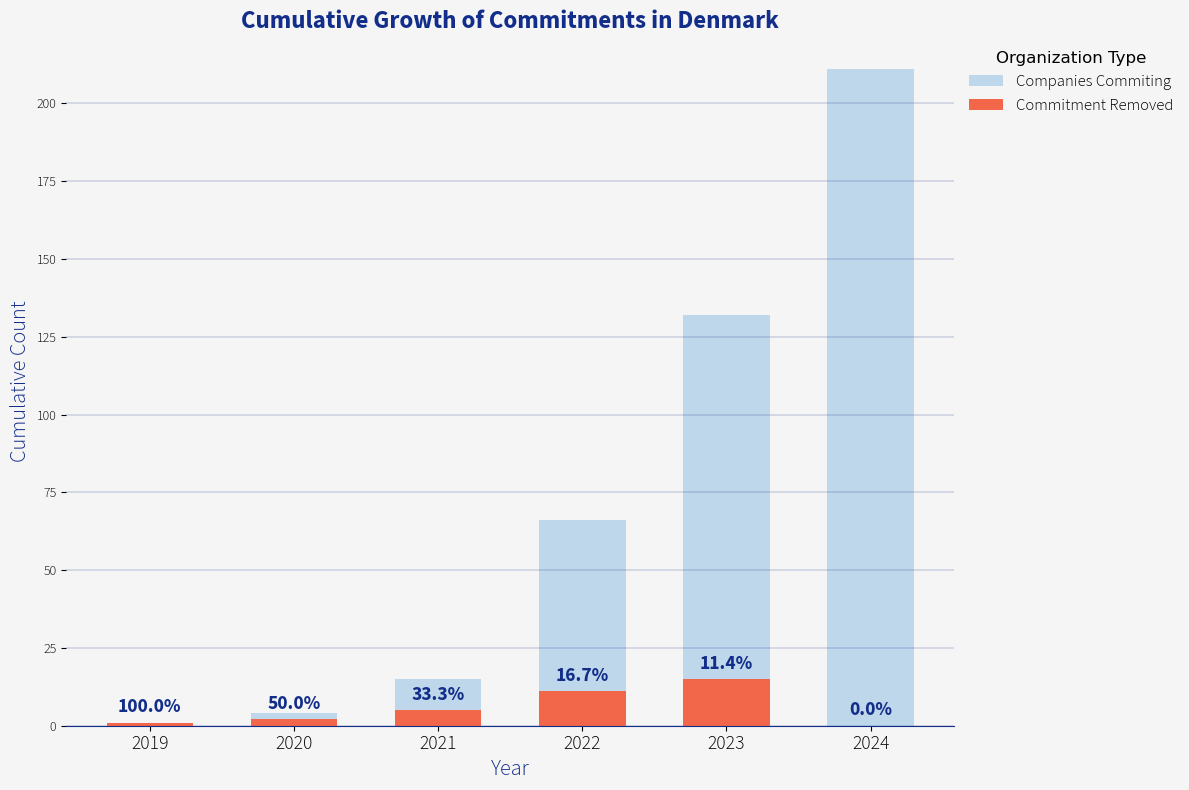

In [725]:
# Replace with your palette if needed
retr_palette = ['#BFD7EA', '#F26749']  # light gray-blue for background, dark blue for foreground

# --- Data and bar setup ---
years = aligned_data['year']
x = np.arange(len(years))

width_bg = 0.6
width_fg = 0.6
fig, ax = plt.subplots(facecolor="#f5f5f5", figsize=(12, 8))  # Set background

# --- Plot bars ---
# Background: All orgs
ax.bar(
    x,
    aligned_data['cumulative_count_org'],
    width=width_bg,
    color=retr_palette[0],
    label='Companies Commiting',
    zorder=1
)

# Foreground: Commitment removed
bars = ax.bar(
    x,
    aligned_data['cumulative_count_retr'],
    width=width_fg,
    color=retr_palette[1],
    label='Commitment Removed',
    zorder=2
)

# --- Labeling ---
ax.set_facecolor("#f5f5f5")
ax.set_xticks(x)
ax.set_xticklabels(years, fontproperties=font_light, fontsize=14)
ax.set_xlabel("Year", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_ylabel("Cumulative Count", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_title("Cumulative Growth of Commitments in Denmark", fontproperties=font_bold, fontsize=18, fontweight='bold', color="#122E8A")

ax.tick_params(axis='y', labelsize=14)
for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)

for i, bar in enumerate(bars):
    retr = bar.get_height()
    total = aligned_data['cumulative_count_org'].iloc[i]
    if total > 0:
        percent = (retr / total) * 100
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            retr + 2,  # slightly above the bar
            f'{percent:.1f}%',  # e.g., 12.3%
            ha='center',
            va='bottom',
            fontsize=14,
            color="#122E8A",
            fontproperties=font_bold
        )

# --- Grid and spines ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color("#122E8A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)

# --- Legend ---
ax.legend(
    title="Organization Type",
    loc="upper left",
    bbox_to_anchor=(1, 1),
    frameon=False,
    prop=font_legend,
    title_fontsize=12
)

plt.tight_layout()
plt.show()


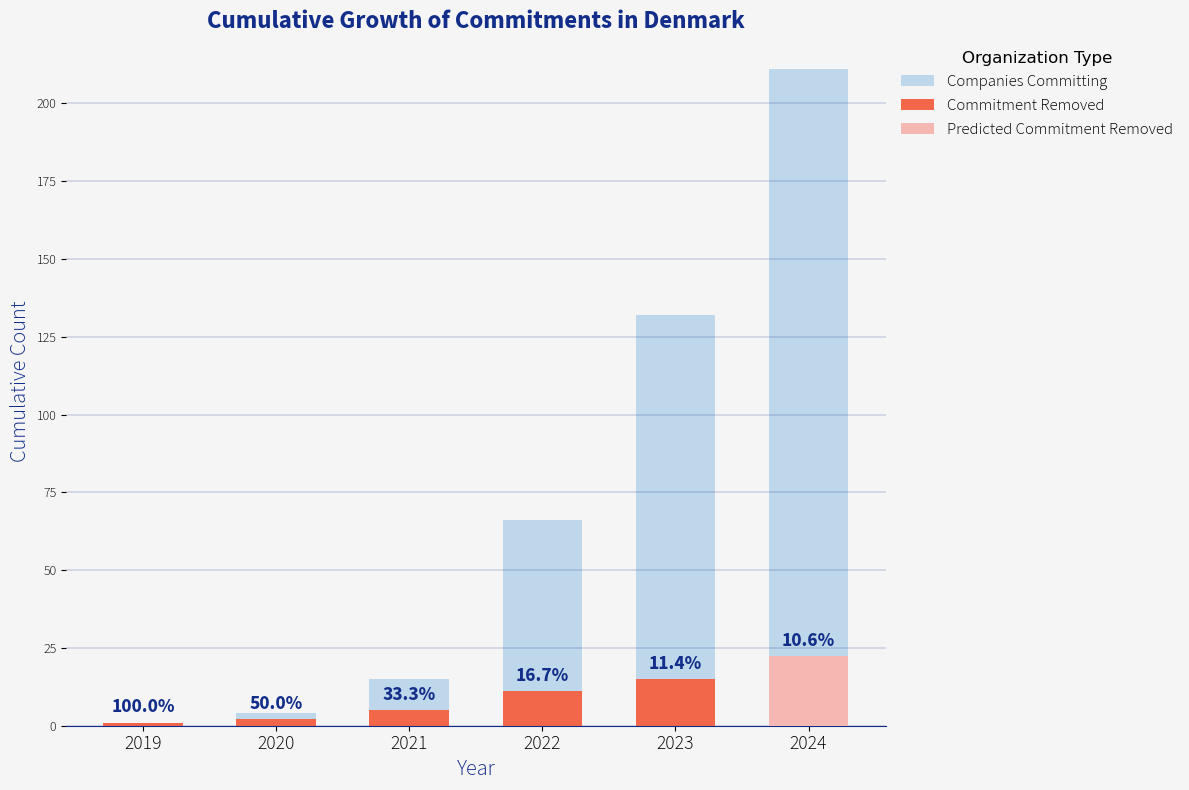

In [726]:
# -- Plotting --

retr_palette = ['#BFD7EA', '#F26749']  # orgs + actual removed
predicted_color = '#F5B7B1'  # orange for prediction

years = aligned_data['year']
x = np.arange(len(years))

width_bg = 0.6
width_fg = 0.6
fig, ax = plt.subplots(facecolor="#f5f5f5", figsize=(12, 8))

# Background: All organizations
ax.bar(
    x,
    aligned_data['cumulative_count_org'],
    width=width_bg,
    color=retr_palette[0],
    label='Companies Committing',
    zorder=1
)

# Foreground: Actual commitment removed
bars = ax.bar(
    x,
    aligned_data['cumulative_count_retr'],
    width=width_fg,
    color=retr_palette[1],
    label='Commitment Removed',
    zorder=2
)

# Prediction for 2024
predicted_year = 2024
predicted_retr = poly_pred_2024
predicted_org = aligned_data[aligned_data['year'] == predicted_year]['cumulative_count_org'].values[0]
x_pred = len(years) - 1  # index for 2024

# Add predicted bar
pred_bar = ax.bar(
    x_pred,
    predicted_retr,
    width=width_fg,
    color=predicted_color,
    label='Predicted Commitment Removed',
    zorder=3
)

# Add percentage label above all bars
for i, bar in enumerate(bars):
    retr = bar.get_height()
    total = aligned_data['cumulative_count_org'].iloc[i]
    
    # Skip 2024's actual retr bar if it's 0 (we're adding a prediction instead)
    if aligned_data['year'].iloc[i] == predicted_year and retr == 0:
        continue

    if total > 0:
        percent = (retr / total) * 100
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            retr + 2,
            f'{percent:.1f}%',
            ha='center',
            va='bottom',
            fontsize=14,
            color="#122E8A",
            fontproperties=font_bold
        )

# Add label for predicted bar
if predicted_org > 0:
    pred_percent = (predicted_retr / predicted_org) * 100
    ax.text(
        x_pred,
        predicted_retr + 2,
        f'{pred_percent:.1f}%',
        ha='center',
        va='bottom',
        fontsize=14,
        color="#122E8A",
        fontproperties=font_bold
    )

# Axis labels, title, ticks
ax.set_facecolor("#f5f5f5")
ax.set_xticks(x)
ax.set_xticklabels(years, fontproperties=font_light, fontsize=14)
ax.set_xlabel("Year", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_ylabel("Cumulative Count", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_title("Cumulative Growth of Commitments in Denmark", fontproperties=font_bold, fontsize=18, fontweight='bold', color="#122E8A")
ax.tick_params(axis='y', labelsize=14)

# Y-axis font
for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)

# Grid and spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color("#122E8A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)

# Legend
ax.legend(
    title="Organization Type",
    loc="upper left",
    bbox_to_anchor=(1, 1),
    frameon=False,
    prop=font_legend,
    title_fontsize=12
)

plt.tight_layout()
plt.show()


In [727]:
# Creating dataset consisting of only the companies with "Commitment removed" in any of the status columns
# Drop the unnecessary columns first
prep = Comp_dk.drop(columns=['region', 'sector','Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19']).reset_index(drop=True)

# Define the columns to check for "Commitment removed"
status_cols = ["near_term_status", "long_term_status", " net_zero_status"]

# Create a mask for rows where any of the status columns contain "Commitment removed"
mask = prep[status_cols].apply(lambda row: "Commitment removed" in row.values, axis=1)

# Use the mask to filter the full rows
retr = prep[mask].reset_index(drop=True)

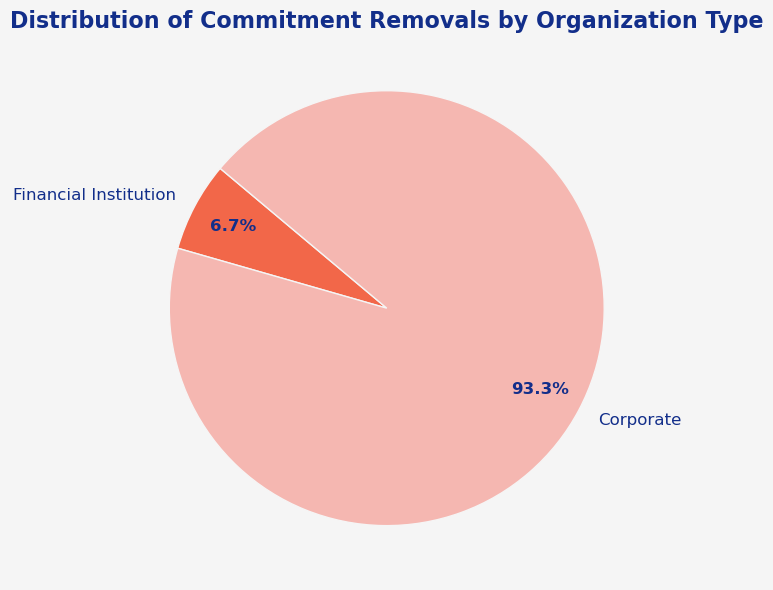

In [728]:
# Group by 'organization_type' and 'year_updated' and count the occurrences
retr_types = retr.groupby(['organization_type', 'year_updated']).size().reset_index(name='count')
retr_type_counts = retr_types.groupby("organization_type")["count"].sum()
retr_type_counts = retr_type_counts.sort_values(ascending=True)


values = retr_type_counts.values.tolist()
labels = retr_type_counts.index.tolist()

#palette = ['#F5B7B1', '#F26749']
colors = sbt_palette[:len(labels)]

# --- Create pie chart with matching style ---
fig, ax = plt.subplots(figsize=(14, 6), facecolor="#f5f5f5")
ax.set_facecolor("#f5f5f5")

# Create the pie chart with sorted data and corresponding colors
wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,  # Apply the color palette
    textprops={'color': "#122E8A", 'fontsize': 12},
    wedgeprops={'edgecolor': '#f5f5f5'},
    pctdistance=0.80
)

# Style the percentage text
for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_color("#122E8A")
    autotext.set_size(12)

# Set the title
ax.set_title(
    'Distribution of Commitment Removals by Organization Type',
    fontsize=16,
    fontweight='bold',
    color="#122E8A"
)

# Remove the spines for a cleaner look
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

In [729]:
retr_types

,organization_type,year_updated,count
0,Corporate,2019,1
1,Corporate,2020,1
2,Corporate,2021,3
3,Corporate,2022,5
4,Corporate,2023,4
5,Financial Institution,2022,1


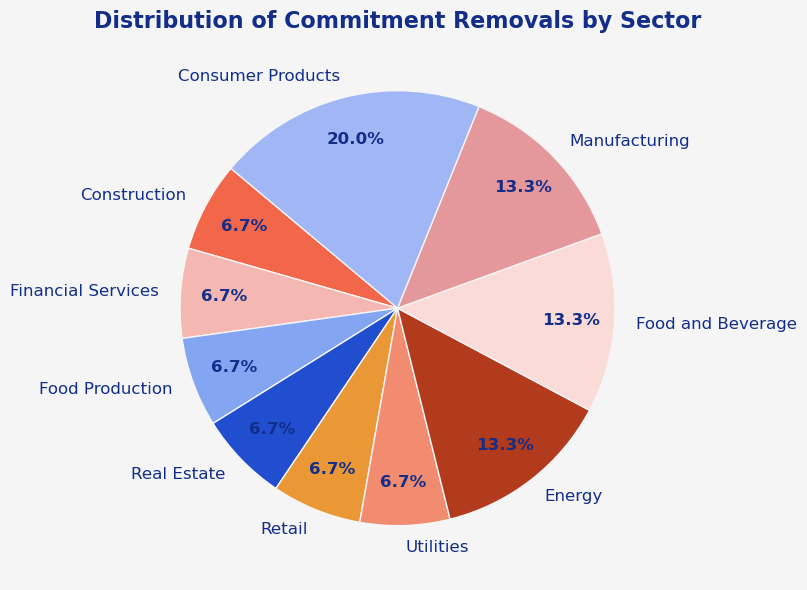

In [730]:
# Group by 'sectorCat' and 'year_updated' and count the occurrences
retr_sect = retr.groupby(['sectorCat', 'year_updated']).size().reset_index(name='count')
retr_sect_counts = retr_sect.groupby("sectorCat")["count"].sum()
retr_sect_counts = retr_sect_counts.sort_values(ascending=True)


values = retr_sect_counts.values.tolist()
labels = retr_sect_counts.index.tolist()

#palette = ['#F5B7B1', '#F26749']
colors = sbt_palette[:len(labels)]

# --- Create pie chart with matching style ---
fig, ax = plt.subplots(figsize=(14, 6), facecolor="#f5f5f5")
ax.set_facecolor("#f5f5f5")

# Create the pie chart with sorted data and corresponding colors
wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,  # Apply the color palette
    textprops={'color': "#122E8A", 'fontsize': 12},
    wedgeprops={'edgecolor': '#f5f5f5'},
    pctdistance=0.80
)

# Style the percentage text
for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_color("#122E8A")
    autotext.set_size(12)

# Set the title
ax.set_title(
    'Distribution of Commitment Removals by Sector',
    fontsize=16,
    fontweight='bold',
    color="#122E8A"
)

# Remove the spines for a cleaner look
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

In [731]:
retr_sect_counts

sectorCat
Construction          1
Financial Services    1
Food Production       1
Real Estate           1
Retail                1
Utilities             1
Energy                2
Food and Beverage     2
Manufacturing         2
Consumer Products     3
Name: count, dtype: int64

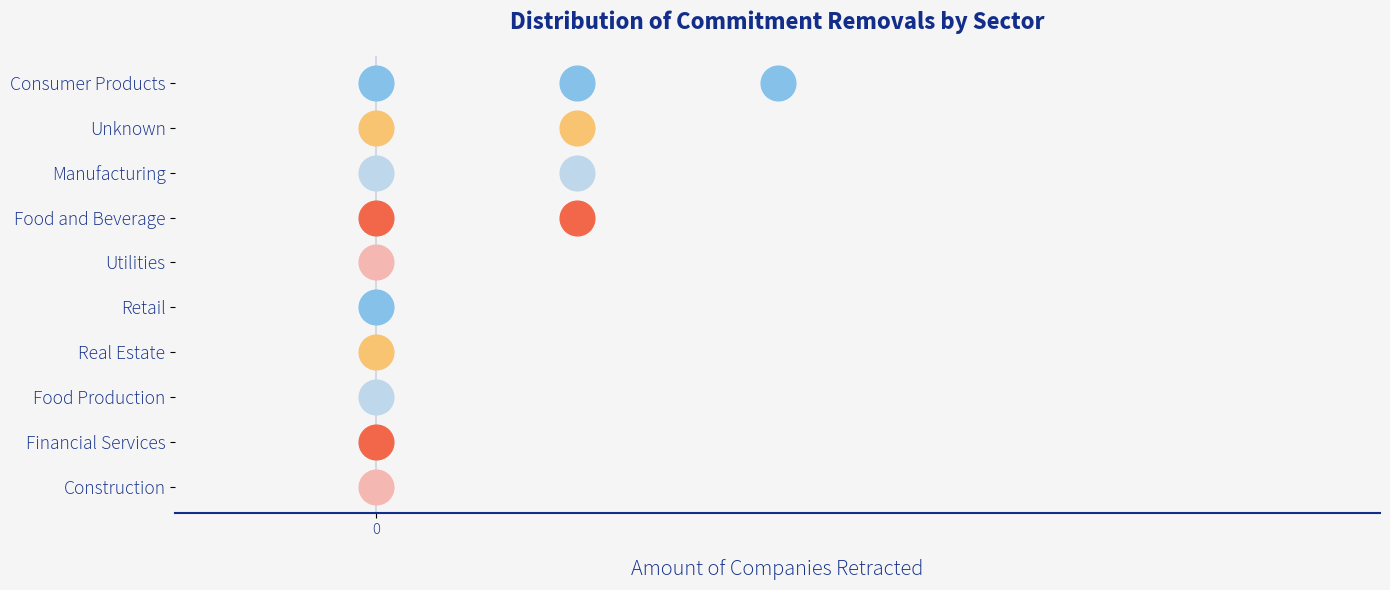

In [732]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Example data (replace with actual data if needed)
labels = [
    "Construction",
    "Financial Services",
    "Food Production",
    "Real Estate",
    "Retail",
    "Utilities",
    "Food and Beverage",
    "Manufacturing",
    "Unknown",
    "Consumer Products"
] # Example sectors

# Palette and fonts
sbt_palette = ['#F5B7B1', '#F26749', '#BFD7EA', '#F8C471', '#85C1E9']  # Example custom color palette
category_colors = {label: sbt_palette[i % len(sbt_palette)] for i, label in enumerate(labels)}

font_bold = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Bold.otf")
font_light = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Light.otf")

# Setup plot
fig, ax = plt.subplots(figsize=(14, 6), facecolor="#f5f5f5")
ax.set_facecolor("#f5f5f5")

# Plot horizontally stacked dots
spacing_factor = 1  # Adjust vertical spacing
for i, (label, count) in enumerate(zip(labels, retr_sect_counts.tolist())):  # Use .tolist() to convert array to list
    for j in range(count):  # Create a circle for each count
        ax.plot(j, i * spacing_factor, 'o', color=category_colors[label], markersize=25, zorder=3)

# Formatting
ax.set_ylim(-0.6, (len(labels) - 1) * spacing_factor + 0.6)
ax.set_xlim(-1, max(retr_sect_counts) + 2)
ax.set_yticks([i * spacing_factor for i in range(len(labels))])
ax.set_yticklabels(
    labels, fontproperties=font_light, fontsize=14, color="#122E8A"
)
ax.set_xticks(np.arange(0, max(retr_sect_counts) + 2, 5))  # Use np.arange for generating tick positions
ax.set_xticklabels(
    list(range(0, max(retr_sect_counts) + 2, 5)), fontproperties=font_light, fontsize=12, color="#122E8A"
)  # Ensure range is converted to a list for compatibility
ax.xaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)

# Add x-axis label
ax.set_xlabel(
    "Amount of Companies Retracted", 
    fontproperties=font_light, fontsize=16, color="#122E8A", labelpad=15
)

# Remove unnecessary spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color("#122E8A")
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_visible(False)

# Add title
ax.set_title(
    "Distribution of Commitment Removals by Sector", 
    fontproperties=font_bold, fontsize=18, fontweight="bold", color="#122E8A", pad=20
)

plt.tight_layout()
plt.show()

In [733]:
retr['target'] = None

# Iterate through each row to check the conditions
for index, row in retr.iterrows():
    # Check if 'Commitment removed' is in 'near_term_status' column
    if row['near_term_status'] == 'Commitment removed':
        retr.at[index, 'target'] = 'Near-term'
    # Check if 'Commitment removed' is in 'long_term_status' column
    elif row['long_term_status'] == 'Commitment removed':
        retr.at[index, 'target'] = 'Long-term'
    # Check if 'Commitment removed' is in 'net_zero_status' column
    elif row[' net_zero_status'] == 'Commitment removed':
        retr.at[index, 'target'] = 'Net-zero'

# Display the updated dataframe with the new 'target' column
print(retr[['target', 'near_term_status', 'long_term_status', ' net_zero_status']].head())

      target    near_term_status long_term_status     net_zero_status
0   Net-zero         Targets set              NaN  Commitment removed
1   Net-zero         Targets set              NaN  Commitment removed
2  Near-term  Commitment removed              NaN                 NaN
3  Near-term  Commitment removed              NaN                 NaN
4   Net-zero         Targets set              NaN  Commitment removed


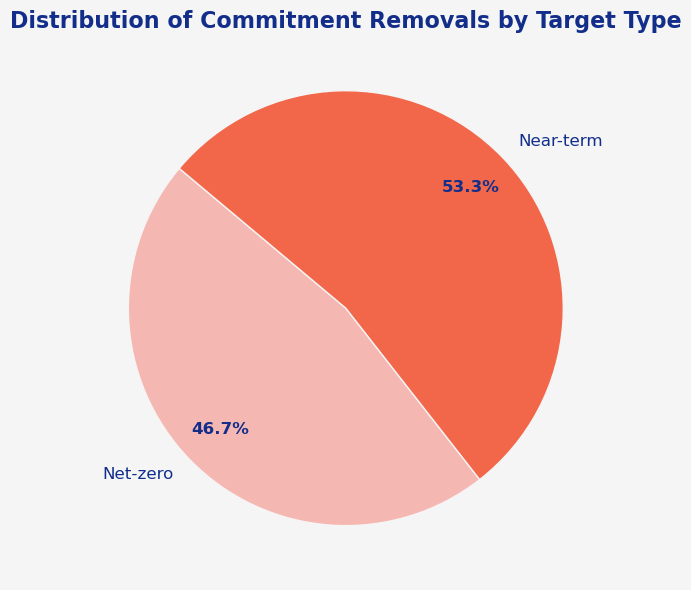

In [734]:
# Group by 'organization_type' and 'year_updated' and count the occurrences
retr_target = retr.groupby(['target', 'year_updated']).size().reset_index(name='count')
retr_target_counts = retr_target.groupby("target")["count"].sum()
retr_target_counts = retr_target_counts.sort_values(ascending=True)
retr_target_counts

values = retr_target_counts.values.tolist()
labels = retr_target_counts.index.tolist()

#palette = ['#F5B7B1', '#F26749']
colors = sbt_palette[:len(labels)]

# --- Create pie chart with matching style ---
fig, ax = plt.subplots(figsize=(14, 6), facecolor="#f5f5f5")
ax.set_facecolor("#f5f5f5")

# Create the pie chart with sorted data and corresponding colors
wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,  # Apply the color palette
    textprops={'color': "#122E8A", 'fontsize': 12},
    wedgeprops={'edgecolor': '#f5f5f5'},
    pctdistance=0.80
)

# Style the percentage text
for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_color("#122E8A")
    autotext.set_size(12)

# Set the title
ax.set_title(
    'Distribution of Commitment Removals by Target Type',
    fontsize=16,
    fontweight='bold',
    color="#122E8A"
)

# Remove the spines for a cleaner look
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()


In [735]:
retr_target

,target,year_updated,count
0,Near-term,2021,2
1,Near-term,2022,5
2,Near-term,2023,1
3,Net-zero,2019,1
4,Net-zero,2020,1
5,Net-zero,2021,1
6,Net-zero,2022,1
7,Net-zero,2023,3


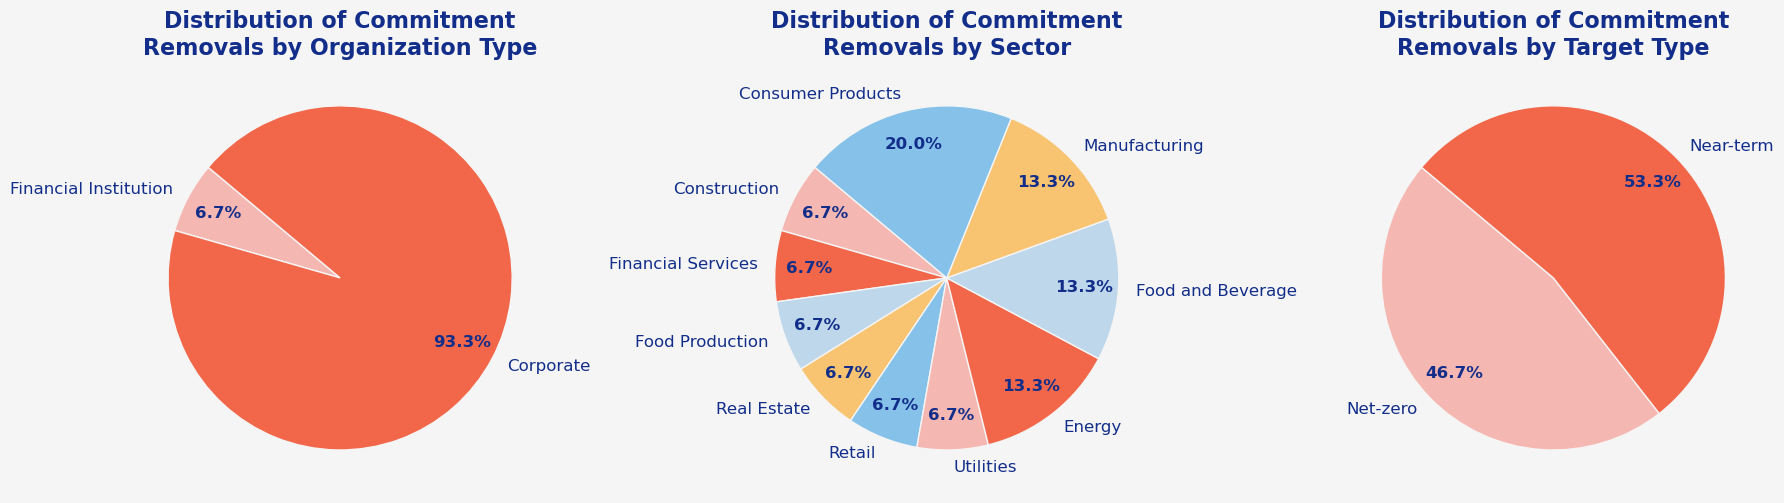

In [736]:
# Define the figure and axes
fig, axs = plt.subplots(1, 3, figsize=(18, 6), facecolor="#f5f5f5")

# --- Pie chart 1 (organization_type) ---
values = retr_type_counts.values.tolist()
labels = retr_type_counts.index.tolist()
colors = sbt_palette[:len(labels)]

wedges, texts, autotexts = axs[0].pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'color': "#122E8A", 'fontsize': 12},
    wedgeprops={'edgecolor': '#f5f5f5'},
    pctdistance=0.80
)

for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_color("#122E8A")
    autotext.set_size(12)

# Break the title into two lines
axs[0].set_title(
    'Distribution of Commitment\nRemovals by Organization Type',
    fontsize=16,
    fontweight='bold',
    color="#122E8A"
)

# --- Pie chart 2 (sectorCat) ---
values = retr_sect_counts.values.tolist()
labels = retr_sect_counts.index.tolist()
colors = sbt_palette[:len(labels)]

wedges, texts, autotexts = axs[1].pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'color': "#122E8A", 'fontsize': 12},
    wedgeprops={'edgecolor': '#f5f5f5'},
    pctdistance=0.80
)

for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_color("#122E8A")
    autotext.set_size(12)

# Break the title into two lines
axs[1].set_title(
    'Distribution of Commitment\nRemovals by Sector',
    fontsize=16,
    fontweight='bold',
    color="#122E8A"
)

# --- Pie chart 3 (target) ---
values = retr_target_counts.values.tolist()
labels = retr_target_counts.index.tolist()
colors = sbt_palette[:len(labels)]

wedges, texts, autotexts = axs[2].pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'color': "#122E8A", 'fontsize': 12},
    wedgeprops={'edgecolor': '#f5f5f5'},
    pctdistance=0.80
)

for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_color("#122E8A")
    autotext.set_size(12)

# Break the title into two lines
axs[2].set_title(
    'Distribution of Commitment\nRemovals by Target Type',
    fontsize=16,
    fontweight='bold',
    color="#122E8A"
)

# Remove spines for a cleaner look
for ax in axs:
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.show()


In [737]:
print(retr_types)
print(retr_sect)
print(retr_target)

       organization_type  year_updated  count
0              Corporate          2019      1
1              Corporate          2020      1
2              Corporate          2021      3
3              Corporate          2022      5
4              Corporate          2023      4
5  Financial Institution          2022      1
             sectorCat  year_updated  count
0         Construction          2022      1
1    Consumer Products          2021      1
2    Consumer Products          2022      1
3    Consumer Products          2023      1
4               Energy          2021      1
5               Energy          2023      1
6   Financial Services          2022      1
7      Food Production          2023      1
8    Food and Beverage          2019      1
9    Food and Beverage          2021      1
10       Manufacturing          2020      1
11       Manufacturing          2023      1
12         Real Estate          2022      1
13              Retail          2022      1
14           Utili

In [738]:
from bokeh.plotting import figure, show
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, Select, CustomJS
from math import pi
import pandas as pd


# Full category sets
all_org_types = retr_types['organization_type'].unique().tolist()
all_sectors = retr_sect['sectorCat'].unique().tolist()
all_targets = retr_target['target'].unique().tolist()

# Prepare pie data
def get_pie_data(data, year, category_col, all_categories):
    filtered = data[data['year_updated'] == year].groupby(category_col)['count'].sum().to_dict()
    values = [filtered.get(cat, 0) for cat in all_categories]
    total = sum(values)
    if total == 0:
        values = [1] * len(all_categories)
        total = sum(values)
    angles = [v / total * 2 * pi for v in values]
    start_angles = [sum(angles[:i]) for i in range(len(angles))]
    end_angles = [sum(angles[:i+1]) for i in range(len(angles))]
    colors = sbt_palette[:len(all_categories)]
    return {
        'categories': all_categories,
        'values': values,
        'start_angle': start_angles,
        'end_angle': end_angles,
        'color': colors
    }

# Initial year data
initial_year = 2023
organization_data = get_pie_data(retr_types, initial_year, 'organization_type', all_org_types)
sector_data = get_pie_data(retr_sect, initial_year, 'sectorCat', all_sectors)
target_data = get_pie_data(retr_target, initial_year, 'target', all_targets)

organization_source = ColumnDataSource(data=organization_data)
sector_source = ColumnDataSource(data=sector_data)
target_source = ColumnDataSource(data=target_data)

# Create pie chart
def create_pie_chart(title, source):
    p = figure(height=600, width=600, title=title, toolbar_location=None,
               tools="hover", tooltips="@categories: @values", x_range=(-0.5, 1))
    p.wedge(x=0, y=1, radius=0.4, 
            start_angle='start_angle', end_angle='end_angle',
            line_color='white', fill_color='color', legend_field='categories',
            source=source)
    p.axis.visible = False
    p.grid.visible = False
    
    # Set background color for the pie chart figure
    p.background_fill_color = "#f5f5f5"
    
    return p

organization_pie = create_pie_chart('Distribution of Commitment Removals by Organization Type', organization_source)
sector_pie = create_pie_chart('Distribution of Commitment Removals by Sector', sector_source)
target_pie = create_pie_chart('Distribution of Commitment Removals by Target Type', target_source)

# JavaScript Callback
callback = CustomJS(args=dict(
    retr_types=retr_types.to_dict(orient='list'),
    retr_sect=retr_sect.to_dict(orient='list'),
    retr_target=retr_target.to_dict(orient='list'),
    organization_source=organization_source,
    sector_source=sector_source,
    target_source=target_source,
    org_categories=all_org_types,
    sect_categories=all_sectors,
    target_categories=all_targets,
    palette=sbt_palette
), code="""  
    function getPieData(data, year, category_col, all_categories) {
        const counts = {};
        for (let i = 0; i < data['year_updated'].length; i++) {
            if (data['year_updated'][i] === year) {
                const cat = data[category_col][i];
                counts[cat] = (counts[cat] || 0) + data['count'][i];
            }
        }

        const values = all_categories.map(cat => counts[cat] || 0);
        let total = values.reduce((a, b) => a + b, 0);
        if (total === 0) {
            values.fill(1);
            total = values.reduce((a, b) => a + b, 0);
        }

        const angles = values.map(v => v / total * 2 * Math.PI);
        const start_angles = [];
        const end_angles = [];
        let cumulative = 0;
        for (let a of angles) {
            start_angles.push(cumulative);
            cumulative += a;
            end_angles.push(cumulative);
        }

        const colors = palette.slice(0, all_categories.length);
        return {
            categories: all_categories,
            values: values,
            start_angle: start_angles,
            end_angle: end_angles,
            color: colors
        };
    }

    const year = parseInt(cb_obj.value);
    organization_source.data = getPieData(retr_types, year, 'organization_type', org_categories);
    sector_source.data = getPieData(retr_sect, year, 'sectorCat', sect_categories);
    target_source.data = getPieData(retr_target, year, 'target', target_categories);
""")

# Year dropdown
all_years = sorted(set(retr_types['year_updated']).union(retr_sect['year_updated']).union(retr_target['year_updated']))
year_select = Select(title="Year", value=str(initial_year), options=[str(y) for y in all_years])
year_select.js_on_change('value', callback)

# Layout
layout = row(year_select, organization_pie, sector_pie, target_pie)

# Show layout
show(layout)


In [ ]:
retr['reason_for_extension_or_removal'].unique()
retr['reason_for_extension_or_removal'].value_counts()


reason_for_extension_or_removal
Expired commitment      13
Withdrawn commitment     1
Company change           1
Name: count, dtype: int64

In [ ]:
retr_reason = retr.groupby(['reason_for_extension_or_removal', 'year_updated']).size().reset_index(name='count')
retr_reason_counts = retr_reason.groupby("reason_for_extension_or_removal")["count"].sum()
retr_reason_counts = retr_reason_counts.sort_values(ascending=True)
retr_reason_counts

reason_for_extension_or_removal
Company change           1
Withdrawn commitment     1
Expired commitment      13
Name: count, dtype: int64

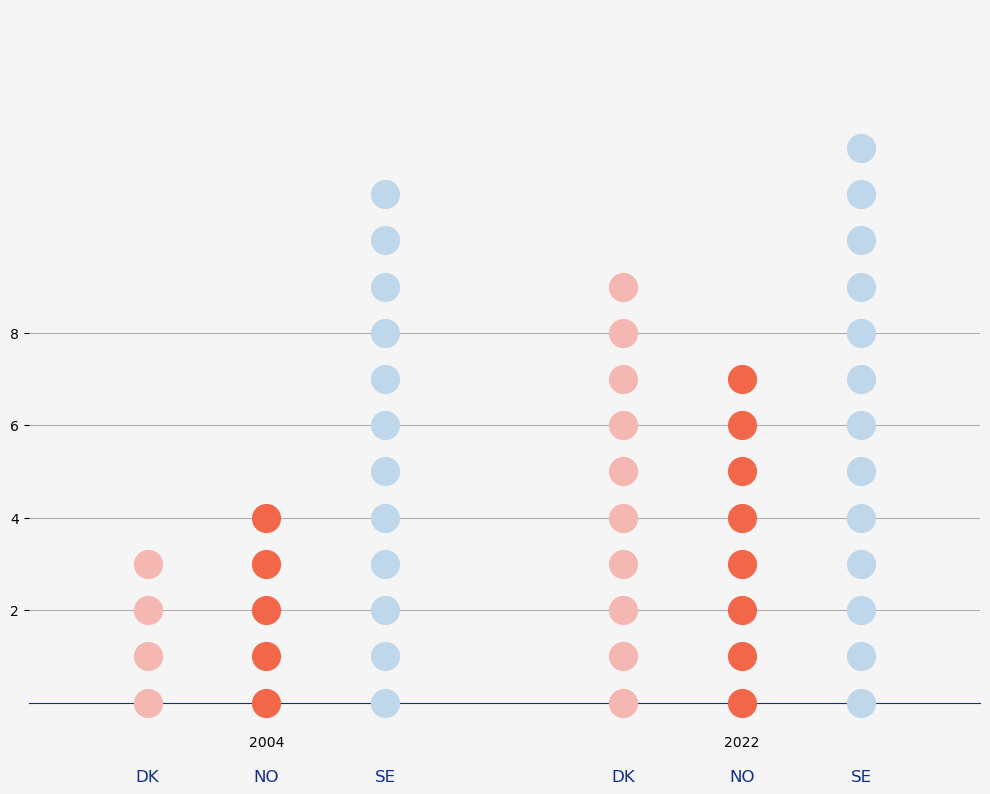

In [ ]:
import matplotlib.pyplot as plt

# Sample data (adjust as needed)
data = {
    "2004": {"DK": 4, "NO": 5, "SE": 12},
    "2022": {"DK": 10, "NO": 8, "SE": 13}
}

# Colors per country using your custom palette
#retr_palette = ['#BFD7EA', '#F26749', '#122E8A']  # DK, NO, SE or similar mapping
country_colors = {
    "DK": sbt_palette[0],
    "NO": sbt_palette[1],
    "SE": sbt_palette[2]
}

# Setup plot
fig, ax = plt.subplots(figsize=(10, 8), facecolor='#f5f5f5')
ax.set_facecolor('#f5f5f5')

x_positions = {
    "2004": [0, 1, 2],
    "2022": [4, 5, 6]
}

# Plot dots
for year, countries in data.items():
    for i, (country, count) in enumerate(countries.items()):
        x = x_positions[year][i]
        for j in range(count):
            ax.plot(x, j, 'o', color=country_colors[country], markersize=20)

# Formatting
ax.set_xlim(-1, 7)
ax.set_ylim(-1, 15)
ax.set_xticks([1, 5])
ax.set_xticklabels(["2004", "2022"], fontsize=35, color="#122E8A")
ax.xaxis.set_tick_params(pad= 20)
ax.set_yticks([2, 4, 6, 8])  # <– Set gridline levels manually
ax.yaxis.grid(True)         # <– Activate grid at these levels

# Country labels
for i, year in enumerate(["2004", "2022"]):
    for j, country in enumerate(["DK", "NO", "SE"]):
        x = x_positions[year][j]
        ax.text(x, -1.6, country, ha='center', va='center', fontsize=12, color="#122E8A")

# Grid, spines, etc.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color("#122E8A")
ax.spines['bottom'].set_position(('data', 0))
ax.spines['bottom'].set_zorder(0)


plt.tight_layout()
plt.show()

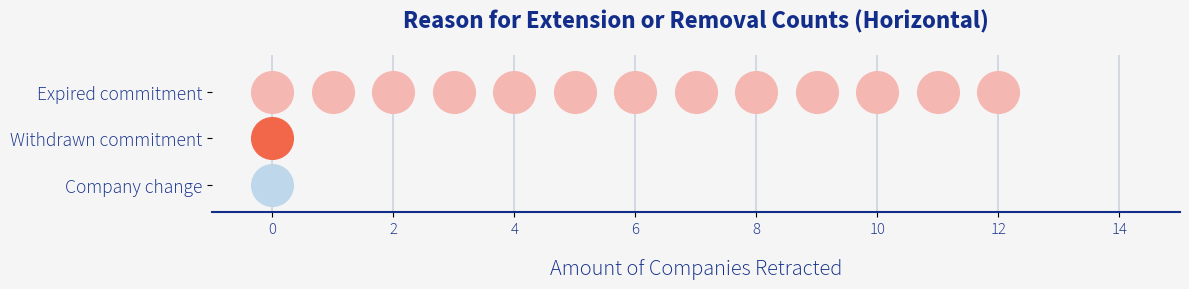

In [ ]:

category_colors = {
    "Company change": sbt_palette[2],
    "Withdrawn commitment": sbt_palette[1],
    "Expired commitment": sbt_palette[0]
}

# Setup plot
fig, ax = plt.subplots(figsize=(12, 3), facecolor="#f5f5f5")
ax.set_facecolor("#f5f5f5")

# Plot horizontally stacked dots
spacing_factor = 1  # Reduce spacing between lines
for i, (reason, count) in enumerate(retr_reason_counts.items()):
    for j in range(count):  # Create a circle for each count
        ax.plot(j, i * spacing_factor, 'o', color=category_colors[reason], markersize=30, zorder=3)

# Formatting
ax.set_ylim(-0.6, (len(retr_reason_counts) - 1) * spacing_factor + 0.8)
ax.set_xlim(-1, max(retr_reason_counts.values) + 2)
ax.set_yticks([i * spacing_factor for i in range(len(retr_reason_counts))])
ax.set_yticklabels(
    retr_reason_counts.keys(), fontproperties=font_light, fontsize=14, color="#122E8A"
)
ax.set_xticks(range(0, max(retr_reason_counts.values) + 2, 2))
ax.set_xticklabels(
    range(0, max(retr_reason_counts.values) + 2, 2), fontproperties=font_light, fontsize=12, color="#122E8A"
)
ax.xaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)

# Remove unnecessary spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color("#122E8A")
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_visible(False)

# Add labels and title
ax.set_xlabel(
    "Amount of Companies Retracted", 
    fontproperties=font_light, fontsize=16, color="#122E8A", labelpad=15
)
ax.set_title(
    "Reason for Extension or Removal Counts (Horizontal)", 
    fontproperties=font_bold, fontsize=18, fontweight="bold", color="#122E8A", pad=20
)

plt.tight_layout()
plt.show()



In [ ]:
retr


,sectorCat,sbti_id,company_name,organization_type,location,near_term_status,near_term_target_classification,near_term_target_year,long_term_status,long_term_target_classification,long_term_target_year,net_zero_status,net_zero_year,reason_for_extension_or_removal,date_updated,year_updated,target
0,Food and Beverage,40000306,Carlsberg Group,Corporate,Denmark,Targets set,1.5°C,2030,NaN,NaN,NaN,Commitment removed,NaN,Expired commitment,2019-12-01,2019,Net-zero
1,Manufacturing,40011359,Vestas Wind Systems,Corporate,Denmark,Targets set,1.5°C,2030,NaN,NaN,NaN,Commitment removed,NaN,Expired commitment,2020-12-01,2020,Net-zero
2,Energy,40010492,Jupiter Bach,Corporate,Denmark,Commitment removed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Expired commitment,2021-03-18,2021,Near-term
3,Consumer Products,40003996,LTP Group A/S,Corporate,Denmark,Commitment removed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Expired commitment,2021-09-22,2021,Near-term
4,Food and Beverage,40000101,Stryhns AS,Corporate,Denmark,Targets set,1.5°C,2030,NaN,NaN,NaN,Commitment removed,NaN,Expired commitment,2021-12-16,2021,Net-zero
5,Construction,40010385,SM Industries,Corporate,Denmark,Commitment removed,NaN,NaN,NaN,NaN,NaN,Commitment removed,NaN,Expired commitment,2022-07-14,2022,Near-term
6,Utilities,40012201,REMONDIS A/S,Corporate,Denmark,Commitment removed,NaN,NaN,NaN,NaN,NaN,Commitment removed,NaN,Expired commitment,2022-10-20,2022,Near-term
7,Consumer Products,40009508,Micro Matic A/S,Corporate,Denmark,Commitment removed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Expired commitment,2022-09-01,2022,Near-term
8,Financial Services,40012437,Merkur Andelskasse,Financial Institution,Denmark,Commitment removed,NaN,NaN,NaN,NaN,NaN,Commitment removed,NaN,Withdrawn commitment,2022-01-15,2022,Near-term
9,Retail,40014134,STARK Group,Corporate,Denmark,Targets set,1.5°C,FY2030,NaN,NaN,NaN,Commitment removed,NaN,Expired commitment,2022-02-17,2022,Net-zero


In [ ]:
Targ_dk

,sector,sectorCat,sbti_id,company_name,location,region,organization_type,action,company_temperature_alignment,target,scope,target_value,type,sub_type,target_classification_short,base_year,target_year,date_published,Comitted year
2055,Food and Beverage Processing,Food and Beverage,40000306,Carlsberg Group,Denmark,Europe,Corporate,Target,1.5°C,Near-term,1+2+3,"0,15",Intensity,Reduction,1.5°C,2015,2022,2017-06-14,2017
2054,Food and Beverage Processing,Food and Beverage,40000306,Carlsberg Group,Denmark,Europe,Corporate,Target,1.5°C,Near-term,1+2+3,30%,Intensity,Reduction,1.5°C,2015,2030,2017-06-14,2017
2052,Food and Beverage Processing,Food and Beverage,40000306,Carlsberg Group,Denmark,Europe,Corporate,Target,1.5°C,Near-term,1+2,92%,Absolute,Reduction,1.5°C,2015,2030,2017-06-14,2017
2053,Food and Beverage Processing,Food and Beverage,40000306,Carlsberg Group,Denmark,Europe,Corporate,Target,1.5°C,Near-term,1+2,46%,Absolute,Reduction,1.5°C,2015,2022,2017-06-14,2017
7310,"Pharmaceuticals, Biotechnology and Life Sciences",Healthcare,40011759,Novo Nordisk A/S,Denmark,Europe,Corporate,Target,1.5°C,Near-term,3,NaN,Engagement,Other,NaN,2015,2030,2018-05-01,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,Containers and Packaging,Packaging,40006959,Faerch A/S,Denmark,Europe,Corporate,Target,1.5°C,Long-term,1+2,"0,9",Absolute,Reduction,1.5°C,2022,2040,2024-03-21,2024
3719,Containers and Packaging,Packaging,40006959,Faerch A/S,Denmark,Europe,Corporate,Target,1.5°C,Long-term,3,"0,9",Absolute,Reduction,NaN,2022,2040,2024-03-21,2024
9242,Retailing,Retail,40002497,Søstrene Grenes Holding ApS,Denmark,Europe,Corporate,Target,1.5°C,Near-term,3,"58,10%",Intensity,Reduction,NaN,2018,2030,2024-06-27,2024
3298,Building Products,Construction,40008989,Ege Carpets,Denmark,Europe,Corporate,Target,1.5°C,Near-term,1+2,"50,60%",Absolute,Reduction,1.5°C,2019,2030,2024-02-15,2024


In [756]:
def determine_target_removed(row):
    if row[" net_zero_status"] == "Commitment removed":
        return "Net Zero"
    elif row["near_term_status"] == "Commitment removed":
        return "Near Term"
    elif row["long_term_status"] == "Commitment removed":
        return "Long Term"
    return None

retr["target_removed"] = retr.apply(determine_target_removed, axis=1)
filtered_retr = retr[retr["target_removed"].notna()][["sbti_id", "company_name", "target_removed"]]

# Rename columns for the new DataFrame
filtered_retr.columns = ["sbti_id", "company_name", "target_removed"]


In [757]:
filtered_retr

,sbti_id,company_name,target_removed
0,40000306,Carlsberg Group,Net Zero
1,40011359,Vestas Wind Systems,Net Zero
2,40010492,Jupiter Bach,Near Term
3,40003996,LTP Group A/S,Near Term
4,40000101,Stryhns AS,Net Zero
5,40010385,SM Industries,Net Zero
6,40012201,REMONDIS A/S,Net Zero
7,40009508,Micro Matic A/S,Near Term
8,40012437,Merkur Andelskasse,Net Zero
9,40014134,STARK Group,Net Zero


In [758]:
# Count occurrences of each sbti_id in Targ_dk
sbti_id_counts = Targ_dk["sbti_id"].value_counts()

# Map the count to the filtered_retr DataFrame
filtered_retr["current_targets"] = filtered_retr["sbti_id"].map(sbti_id_counts).fillna(0).astype(int)

print(filtered_retr)

     sbti_id         company_name target_removed  current_targets
0   40000306      Carlsberg Group       Net Zero                4
1   40011359  Vestas Wind Systems       Net Zero                2
2   40010492         Jupiter Bach      Near Term                0
3   40003996        LTP Group A/S      Near Term                0
4   40000101           Stryhns AS       Net Zero                5
5   40010385        SM Industries       Net Zero                0
6   40012201         REMONDIS A/S       Net Zero                0
7   40009508      Micro Matic A/S      Near Term                0
8   40012437   Merkur Andelskasse       Net Zero                0
9   40014134          STARK Group       Net Zero                3
10  40008119                 NREP       Net Zero                0
11  40001006    GN Store Nord A/S       Net Zero                2
12  40006339               Clever       Net Zero                0
13  40004517         BioMar Group       Net Zero                2
14  400107

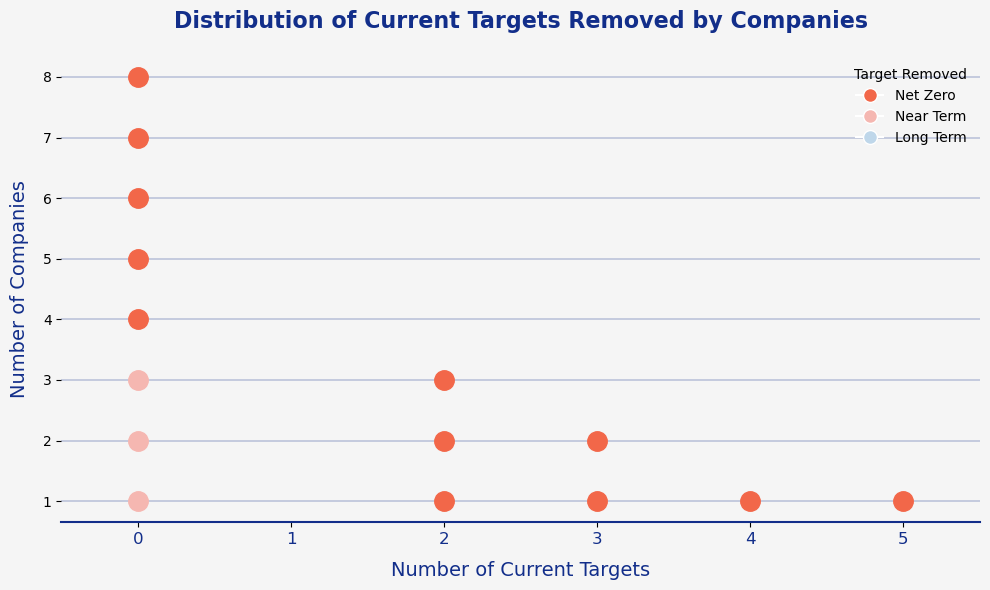

In [759]:
# sort filtered_retr by target_removed
filtered_retr = filtered_retr.sort_values(by="target_removed")


# Colors
category_colors = {
    "Net Zero": sbt_palette[1],
    "Near Term": sbt_palette[0],
    "Long Term": sbt_palette[2]
}

# Setup plot
fig, ax = plt.subplots(figsize=(10, 6), facecolor="#f5f5f5")
ax.set_facecolor("#f5f5f5")

# Group and count each company occurrence by current_targets
counts = {}

# For each company, place a dot at (current_targets, vertical stack position)
for _, row in filtered_retr.iterrows():
    x = row["current_targets"]
    category = row["target_removed"]
    
    # Count how many companies already at this x
    y = counts.get(x, 0) + 1
    counts[x] = y

    # Plot dot
    ax.plot(x, y, 'o', color=category_colors.get(category, "#999999"), markersize=14, zorder=3)

# Axis and labels
ax.set_xlim(-0.5, 5.5)
ax.set_xticks(range(0, 6))
ax.set_xticklabels(range(0, 6), fontsize=12, color="#122E8A")
ax.set_xlabel("Number of Current Targets", fontsize=14, color="#122E8A", labelpad=10)

ax.set_ylabel("Number of Companies", fontsize=14, color="#122E8A", labelpad=10)
ax.yaxis.grid(True, linestyle='-', linewidth=0.3, color="#122E8A", zorder=0)

# Spines and cleanup
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color("#122E8A")
ax.spines['bottom'].set_linewidth(1.5)

# Title
ax.set_title("Distribution of Current Targets Removed by Companies", fontsize=16, fontweight="bold", color="#122E8A", pad=20)

# Optional legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=k, markerfacecolor=v, markersize=10)
           for k, v in category_colors.items()]
ax.legend(handles=handles, title="Target Removed", frameon=False, loc='upper right')

plt.tight_layout()
plt.show()


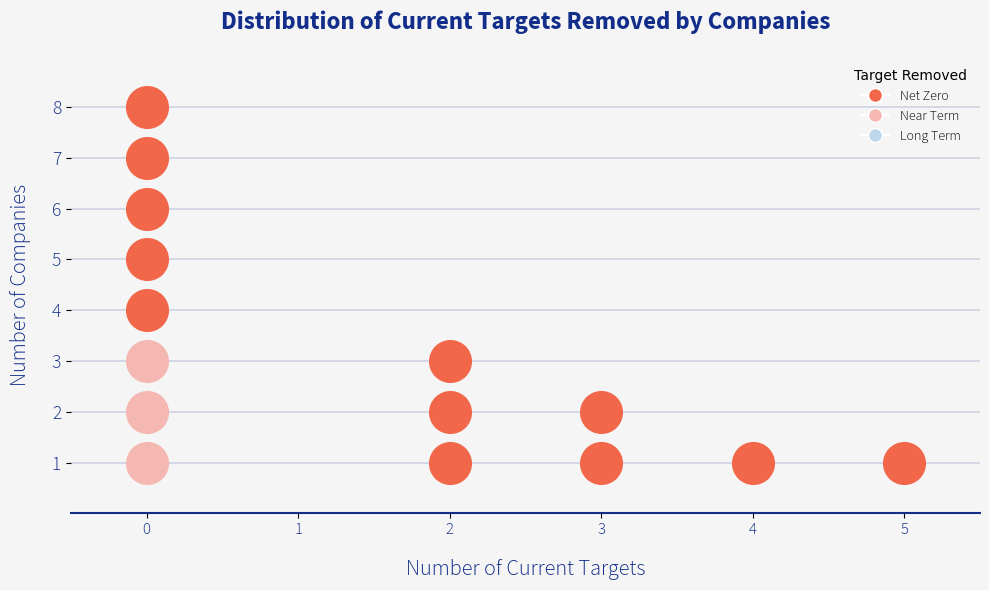

In [760]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import font_manager

# Sort by target_removed for consistent color mapping
filtered_retr = filtered_retr.sort_values(by="target_removed")

# Visual identity colors
category_colors = {
    "Net Zero": sbt_palette[1],
    "Near Term": sbt_palette[0],
    "Long Term": sbt_palette[2]
}

# Setup plot
fig, ax = plt.subplots(figsize=(10, 6), facecolor="#f5f5f5")
ax.set_facecolor("#f5f5f5")

# Track vertical stacking for each current_targets value
counts = {}

for _, row in filtered_retr.iterrows():
    x = row["current_targets"]
    category = row["target_removed"]
    
    y = counts.get(x, 0) + 1
    counts[x] = y

    ax.plot(x, y, 'o', color=category_colors.get(category, "#999999"), markersize=30, zorder=3)

# Axes limits and ticks
max_x = 5
ax.set_xlim(-0.5, max_x + 0.5)
ax.set_ylim(0, max(counts.values()) + 1)

ax.set_xticks(range(0, max_x + 1))
ax.set_xticklabels(
    range(0, max_x + 1), fontproperties=font_light, fontsize=12, color="#122E8A"
)
ax.set_yticks(range(1, max(counts.values()) + 1))
ax.set_yticklabels(
    range(1, max(counts.values()) + 1), fontproperties=font_light, fontsize=14, color="#122E8A"
)

# Axis labels
ax.set_xlabel(
    "Number of Current Targets", fontproperties=font_light, fontsize=16, color="#122E8A", labelpad=15
)
ax.set_ylabel(
    "Number of Companies", fontproperties=font_light, fontsize=16, color="#122E8A", labelpad=15
)

# Grid and spines
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color("#122E8A")
ax.spines['bottom'].set_linewidth(1.5)

# Title
ax.set_title(
    "Distribution of Current Targets Removed by Companies", 
    fontproperties=font_bold, fontsize=18, fontweight="bold", color="#122E8A", pad=20
)

# Legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=k, markerfacecolor=v, markersize=10)
           for k, v in category_colors.items()]
ax.legend(handles=handles, title="Target Removed", frameon=False, loc='upper right', prop=font_light)

plt.tight_layout()
plt.show()
